In [2]:
import seaborn as sns

In [3]:
import pandas as pd

df_final = pd.read_csv("./data/df_final.csv")

In [4]:
df_final = df_final.rename(columns = {'human_success':'Humans', 'bert_00success':'BERT', 'mnli_00success':'BART MNLI'})

# 1. know about logic 

In [213]:
df1 = df_final[['Humans','BERT', 'BART MNLI']].mean()
df1 = df1.to_frame().reset_index()
df1.columns=["Algo",'Success Rate']
new_row = {'Algo':'Random', 'Success Rate':0.222}
#append row to the dataframe
df1 = df1.append(new_row, ignore_index=True).sort_values(by='Success Rate')
df1

,Algo,Success Rate
1,BERT,0.191517
3,Random,0.222000
0,Humans,0.451417
2,BART MNLI,0.495131


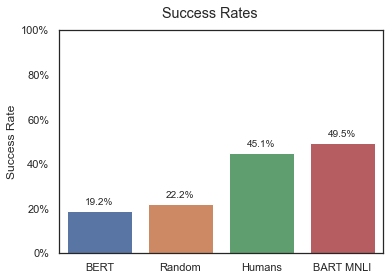

In [214]:
x = df1["Algo"]
y = df1["Success Rate"]

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
ax  = sns.barplot(data=df1, x=x, y = y)
ax.figure.suptitle("Success Rates")
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('')

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.1%'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.savefig("./charts/1_success_rates.png")

plt.show()


# 2. Same logic?

## Same result

In [5]:
df_final["same_BERT"] = df_final["human_success"] + df_final["bert_00success"]
df_final["same_BART_MNLI"] = df_final["human_success"] + df_final["mnli_00success"]

KeyError: 'human_success'

In [13]:
df_final.shape

(4621, 13)

In [14]:
df_final["same_BERT"].value_counts()/4621

0    0.480848
1    0.395369
2    0.123783
Name: same_BERT, dtype: float64

In [15]:
df_final["same_BART_MNLI"].value_counts()/4621

0    0.353820
1    0.345813
2    0.300368
Name: same_BART_MNLI, dtype: float64

In [78]:
random_success= 0.451417*0.125
random_fail = (1-0.451417)*(1-0.125)
random_differ = 1 - (random_success+random_fail)


print(random_success, random_fail, random_differ)

0.056427125 0.48001012500000007 0.4635627499999999


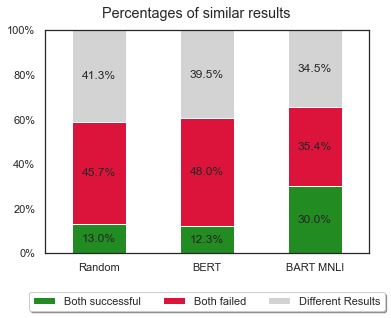

In [10]:
# create DataFrame
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
df = pd.DataFrame({'Both successful': [0.1304, 0.123, 0.300],
                   'Both failed': [0.4568, 0.480, 0.3538],
                   'Different Results': [0.4127, 0.3953, 0.345]},
                  index=['Random', 'BERT', 'BART MNLI'])

 
sns.set(style='white')
# create stacked bar chart for monthly temperatures
ax = df.plot(kind='bar', stacked=True, color=['forestgreen', 'crimson', 'lightgray'])
ax.figure.suptitle("Percentages of similar results")
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('')
ax.xaxis.set_tick_params(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1%}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
# for bar in ax.patches:
   

#   # Using Matplotlib's annotate function and
#   # passing the coordinates where the annotation shall be done
#   # x-coordinate: bar.get_x() + bar.get_width() / 2
#   # y-coordinate: bar.get_height()
#   # free space to be left to make graph pleasing: (0, 8)
#   # ha and va stand for the horizontal and vertical alignment
#     ax.annotate(format(bar.get_height(), '.1%'),
#                    (bar.get_x() + bar.get_width() / 2,
#                     bar.get_height()), ha='center', va='center',
#                    size=10, xytext=(0, 8),
#                    textcoords='offset points')
plt.savefig("./charts/2_percentage_similarity.png", bbox_inches='tight')

plt.show()


## Same answer

In [16]:
df_final.columns

Index(['human_response_index', 'human_success', 'best_bert_00_index',
       'bert_00success', 'best_mnli_00_index', 'mnli_00success', 'task_form',
       'implicatur', 'mode', 'signe', 'absurde', 'same_BERT',
       'same_BART_MNLI'],
      dtype='object')

In [19]:
df_final["same_answer_BERT"] =  df_final[["human_response_index","best_bert_00_index"]].apply(lambda x: 1 if x[0] == x[1] else 0 ,axis =1 )
df_final["same_answer_BART_MNLI"] =  df_final[["human_response_index","best_mnli_00_index"]].apply(lambda x: 1 if x[0] == x[1] else 0 ,axis =1 )

In [22]:
df_final[["same_answer_BERT","human_success" ]].groupby(["human_success","same_answer_BERT"]).size()/4621

human_success  same_answer_BERT
0              0                   0.495347
               1                   0.053235
1              0                   0.361826
               1                   0.089591
dtype: float64

In [23]:
df_final[["same_answer_BART_MNLI","human_success" ]].groupby(["human_success","same_answer_BART_MNLI"]).size()/4621

human_success  same_answer_BART_MNLI
0              0                        0.460074
               1                        0.088509
1              0                        0.254490
               1                        0.196927
dtype: float64

# Specific

In [24]:
df_final.columns

Index(['human_response_index', 'human_success', 'best_bert_00_index',
       'bert_00success', 'best_mnli_00_index', 'mnli_00success', 'task_form',
       'implicatur', 'mode', 'signe', 'absurde', 'same_BERT', 'same_BART_MNLI',
       'same_answer_BART_MNLI', 'same_answer_BERT'],
      dtype='object')

## signe

In [96]:
df_final.columns

Index(['human_response_index', 'Humans', 'best_bert_00_index', 'BERT',
       'best_mnli_00_index', 'BART MNLI', 'task_form', 'implicatur', 'mode',
       'signe', 'absurde'],
      dtype='object')

In [26]:
df_signe = df_final[['Humans','BERT', 'BART MNLI','signe']].groupby("signe").mean()
df_signe = df_signe.transpose()
df_signe = df_signe.reset_index()
new_row = {'negatif':0.2, 'positif':0.2857, "index":"Random"}
#append row to the dataframe
df_signe = df_signe.append(new_row, ignore_index=True)
df_signe = df_signe.rename(columns ={ "index": "Signe"})

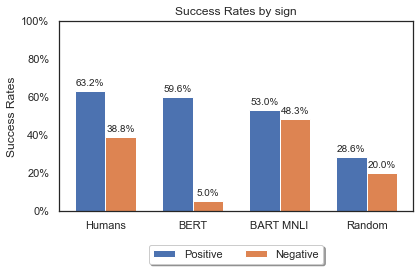

In [27]:
import matplotlib.ticker as mtick
import numpy as np

x = np.arange(4)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_signe.positif, width, label='Positive')
rects2 = ax.bar(x + width/2, df_signe.negatif, width, label='Negative')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rates')
ax.set_title('Success Rates by sign')
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('')
ax.set_xticks(x, df_signe.Signe)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.1%'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

fig.tight_layout()
plt.savefig("./charts/3_SR_by_sign.png")

plt.show()




In [ ]:
df

,Both successful,Both failed,Different Result
Random,0.0564,0.4800,0.4636
BERT,0.1230,0.4800,0.3953
BART MNLI,0.3000,0.3538,0.3450


## mode

In [24]:
df_mode = df_final[['Humans','BERT', 'BART MNLI','mode']].groupby("mode").mean()
df_mode = df_mode.transpose()
df_mode = df_mode.reset_index()
new_row = {'particulier':0.15625, 'universel':0.31818, "index":"Random"}
#append row to the dataframe
df_mode = df_mode.append(new_row, ignore_index=True)
df_mode = df_mode.rename(columns ={ "index": "Signe"})


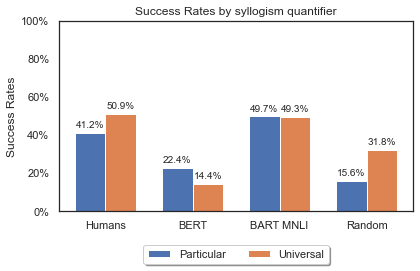

In [25]:
import matplotlib.ticker as mtick
import numpy as np

x = np.arange(4)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_mode.particulier, width, label='Particular')
rects2 = ax.bar(x + width/2, df_mode.universel, width, label='Universal')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rates')
ax.set_title('Success Rates by syllogism quantifier')
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('')
ax.set_xticks(x, df_mode.Signe)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.1%'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

fig.tight_layout()
plt.savefig("./charts/3_SR_by_quantifier.png")
plt.show()


## implicatur

In [22]:
df_impl = df_final[['Humans','BERT', 'BART MNLI','implicatur']].groupby("implicatur").mean()
df_impl = df_impl.transpose()
df_impl.columns = ['Other Syllogisms', 'Presupposition']
df_impl = df_impl.reset_index()
new_row = {'Other Syllogisms':0.2386, 'Presupposition':0.150, "index":"Random"}
#append row to the dataframe
df_impl = df_impl.append(new_row, ignore_index=True)
df_impl = df_impl.rename(columns ={ "index": "Signe"})

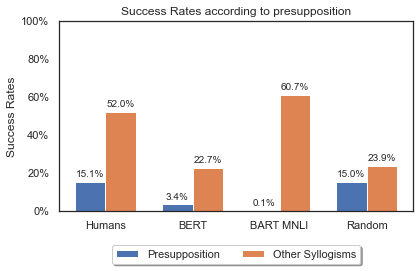

In [28]:
import matplotlib.ticker as mtick
import numpy as np

x = np.arange(4)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_impl['Implicatur'], width, label='Presupposition')
rects2 = ax.bar(x + width/2, df_impl['Other Syllogisms'], width, label='Other Syllogisms')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rates')
ax.set_title('Success Rates according to presupposition')
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('')
ax.set_xticks(x, df_impl.Signe)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.1%'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

fig.tight_layout()

plt.savefig("./charts/3_SR_by_implicatur.png")

plt.show()


## Absurd

In [20]:
df_absurd = df_final[['Humans','BERT', 'BART MNLI','absurde']].groupby("absurde").mean()
df_absurd = df_absurd.transpose()
df_absurd.columns = ['Other Syllogisms', 'reductio ad absurdum']
df_absurd = df_absurd.reset_index()
new_row = {'Other Syllogisms':0.2391, 'reductio ad absurdum':0.125, "index":"Random"}
#append row to the dataframe
df_absurd = df_absurd.append(new_row, ignore_index=True)
df_absurd = df_absurd.rename(columns ={ "index": "Signe"})

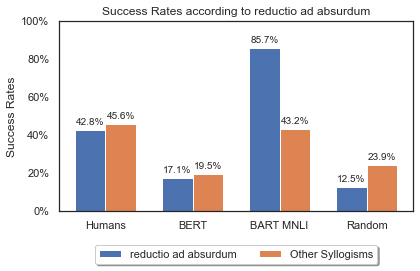

In [21]:
import matplotlib.ticker as mtick
import numpy as np

x = np.arange(4)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_absurd['reductio ad absurdum'], width, label='reductio ad absurdum')
rects2 = ax.bar(x + width/2, df_absurd['Other Syllogisms'], width, label='Other Syllogisms')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rates')
ax.set_title('Success Rates according to reductio ad absurdum')
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('')
ax.set_xticks(x, df_absurd.Signe)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.1%'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

fig.tight_layout()

plt.savefig("./charts/3_SR_by_absurd.png")

plt.show()

# Reponse type

In [147]:
df_final.columns

Index(['human_response_index', 'Humans', 'best_bert_00_index', 'BERT',
       'best_mnli_00_index', 'BART MNLI', 'task_form', 'implicatur', 'mode',
       'signe', 'absurde'],
      dtype='object')

In [148]:
df_final.shape

(4621, 11)

In [155]:
df_final["best_bert_00_index"].value_counts()/4621

2    0.382601
0    0.288249
1    0.128544
3    0.117507
4    0.040684
5    0.035274
7    0.003679
6    0.003462
Name: best_bert_00_index, dtype: float64

In [156]:
df_final["best_mnli_00_index"].value_counts()/4621

6    0.255789
5    0.228738
4    0.164250
7    0.123134
0    0.100411
2    0.090024
1    0.020991
3    0.016663
Name: best_mnli_00_index, dtype: float64

In [151]:
bert_ccl = df_final["best_bert_00_index"].value_counts()/4621
mnli_ccl = df_final["best_mnli_00_index"].value_counts()/4621
human_ccl = df_final["human_response_index"].value_counts()/4621

In [154]:
df_ccl = pd.concat([bert_ccl,mnli_ccl,human_ccl],axis = 1)
df_ccl

,best_bert_00_index,best_mnli_00_index,human_response_index
0,0.288249,0.100411,0.057780
1,0.128544,0.020991,0.037871
2,0.382601,0.090024,0.117507
3,0.117507,0.016663,0.101277
4,0.040684,0.164250,0.123999
5,0.035274,0.228738,0.124865
6,0.003462,0.255789,0.151915
7,0.003679,0.123134,0.132222
8,NaN,NaN,0.152564


In [160]:
df_val_freq= pd.read_csv("./data/ccl_freq.csv")
df_val_freq = df_val_freq.set_index("Unnamed: 0")
df_val_freq.columns = ["Valid conclusion"]
df_val_freq

,Valid conclusion
Unnamed: 0,
0,0.020833
1,0.020833
2,0.145833
3,0.104167
4,0.250000
5,0.291667
6,0.083333
7,0.083333


In [164]:
df_ccl_freq = pd.concat([df_ccl,df_val_freq],axis = 1)
df_ccl_freq = df_ccl_freq.drop(8)
df_ccl_freq



,best_bert_00_index,best_mnli_00_index,human_response_index,Valid conclusion
0,0.288249,0.100411,0.057780,0.020833
1,0.128544,0.020991,0.037871,0.020833
2,0.382601,0.090024,0.117507,0.145833
3,0.117507,0.016663,0.101277,0.104167
4,0.040684,0.164250,0.123999,0.250000
5,0.035274,0.228738,0.124865,0.291667
6,0.003462,0.255789,0.151915,0.083333
7,0.003679,0.123134,0.132222,0.083333


In [167]:
choice_form = pd.Series(['Aac', 'Aca', 'Iac', 'Ica', 'Oac', 'Oca', 'Eac', 'Eca'])

In [182]:
df_ccl_freq

,best_bert_00_index,best_mnli_00_index,human_response_index,Valid conclusion
Aac,0.288249,0.100411,0.057780,0.020833
Aca,0.128544,0.020991,0.037871,0.020833
Iac,0.382601,0.090024,0.117507,0.145833
Ica,0.117507,0.016663,0.101277,0.104167
Oac,0.040684,0.164250,0.123999,0.250000
Oca,0.035274,0.228738,0.124865,0.291667
Eac,0.003462,0.255789,0.151915,0.083333
Eca,0.003679,0.123134,0.132222,0.083333


In [181]:
df_ccl_freq = df_ccl_freq.set_index(choice_form)

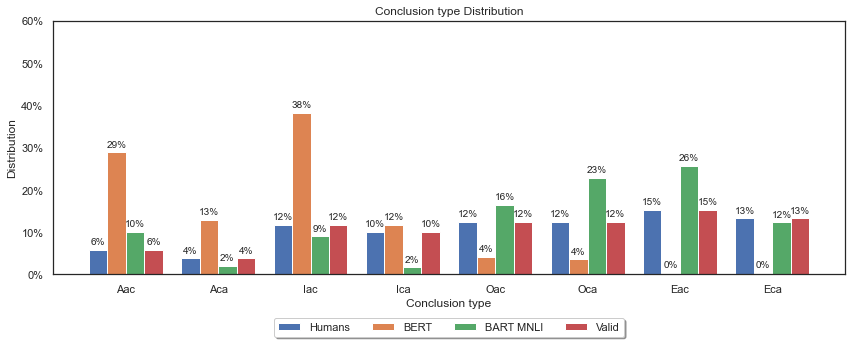

In [186]:
import matplotlib.ticker as mtick
import numpy as np

x = np.arange(8)  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

rects1 = ax.bar(x - (width + width/2), df_ccl_freq['human_response_index'], width, label='Humans')
rects2 = ax.bar(x - width/2, df_ccl_freq['best_bert_00_index'], width, label='BERT')
rects3 = ax.bar(x + width/2, df_ccl_freq['best_mnli_00_index'], width, label='BART MNLI')
rects4 = ax.bar(x + (width + width/2), df_ccl_freq['human_response_index'], width, label='Valid')

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, df_absurd['reductio ad absurdum'], width, label='reductio ad absurdum')
# rects2 = ax.bar(x + width/2, df_absurd['Other Syllogisms'], width, label='Other Syllogisms')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Distribution')
ax.set_title('Conclusion type Distribution')
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,0.6)
ax.set_xlabel('Conclusion type')
ax.set_xticks(x, df_ccl_freq.index)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.0%'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

fig.tight_layout()
plt.savefig("./charts/Bonus_conclusion_type_distribution.png")
plt.show()

# Succes Rates by task form

In [210]:
df_task = df_final[['Humans','BERT', 'BART MNLI','task_form']].groupby("task_form").mean()
df_task 

,Humans,BERT,BART MNLI
task_form,,,
AA1,0.795322,0.847953,0.912281
AA2,0.678363,0.438596,0.549708
AA4,0.292398,0.134503,0.000000
AE1,0.872093,0.046512,1.000000
AE2,0.087719,0.005848,0.000000
AE3,0.818713,0.040936,1.000000
AE4,0.181287,0.011696,0.000000
AI2,0.777778,0.777778,0.374269
AI4,0.760234,0.602339,0.883041


In [211]:
random_success = pd.read_csv("./data/random_success.csv")
random_success = random_success.set_index("task_form")
df_task = pd.concat([df_task,random_success], axis=1)
df_task

,Humans,BERT,BART MNLI,random_succes
task_form,,,,
AA1,0.795322,0.847953,0.912281,0.375
AA2,0.678363,0.438596,0.549708,0.375
AA4,0.292398,0.134503,0.000000,0.250
AE1,0.872093,0.046512,1.000000,0.500
AE2,0.087719,0.005848,0.000000,0.125
AE3,0.818713,0.040936,1.000000,0.500
AE4,0.181287,0.011696,0.000000,0.125
AI2,0.777778,0.777778,0.374269,0.250
AI4,0.760234,0.602339,0.883041,0.250


In [197]:
df_task.

(27, 3)

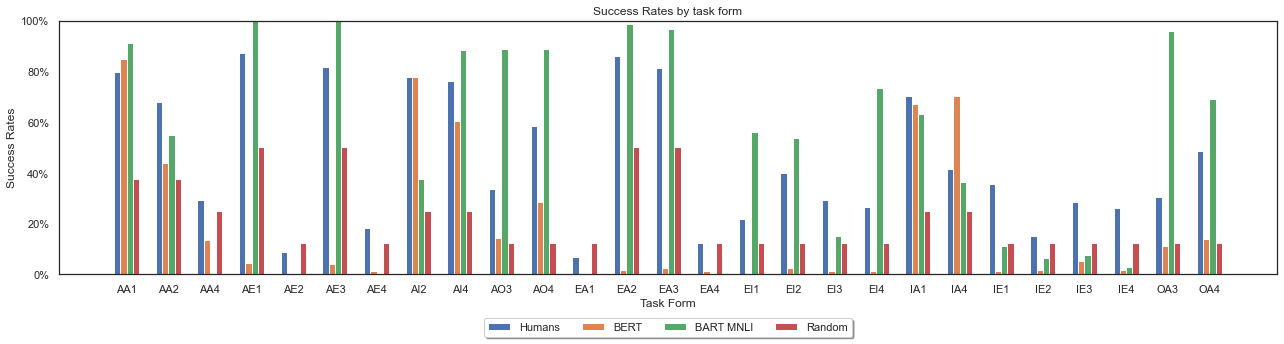

In [231]:
import matplotlib.ticker as mtick
import numpy as np

x = np.arange(27)  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(18, 5)

rects1 = ax.bar(x - (width + width/2),df_task['Humans'], width, label='Humans')
rects2 = ax.bar(x - width/2, df_task['BERT'], width, label='BERT')
rects3 = ax.bar(x + width/2, df_task['BART MNLI'], width, label='BART MNLI')
rects4 = ax.bar(x + (width + width/2), df_task['random_succes'], width, label='Random')



# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, df_absurd['reductio ad absurdum'], width, label='reductio ad absurdum')
# rects2 = ax.bar(x + width/2, df_absurd['Other Syllogisms'], width, label='Other Syllogisms')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rates')
ax.set_title('Success Rates by task form')
ax.figure.subplots_adjust(left=0.15, top=0.9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax.set_xlabel('Task Form')
ax.set_xticks(x, df_task.index)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

# for bar in ax.patches:
   
#   # Using Matplotlib's annotate function and
#   # passing the coordinates where the annotation shall be done
#   # x-coordinate: bar.get_x() + bar.get_width() / 2
#   # y-coordinate: bar.get_height()
#   # free space to be left to make graph pleasing: (0, 8)
#   # ha and va stand for the horizontal and vertical alignment
#     ax.annotate(format(bar.get_height(), '.0%'),
#                    (bar.get_x() + bar.get_width() / 2,
#                     bar.get_height()), ha='center', va='center',
#                    size=10, xytext=(0, 8),
#                    textcoords='offset points')

fig.tight_layout()
plt.savefig("./charts/Bonus_SR_by_task_form.png")
plt.show()

# Random similarity

In [218]:
df_task.columns

Index(['Humans', 'BERT', 'BART MNLI', 'random_succes'], dtype='object')

In [223]:
df_task["both_good"] = df_task["Humans"]*df_task["random_succes"]
df_task["both_wrong"] = (1- df_task["Humans"])*(1 - df_task["random_succes"])
df_task["differ"] = 1 - (df_task["both_good"]  + df_task["both_wrong"] ) 
df_task

,Humans,BERT,BART MNLI,random_succes,both_good,both_wrong,differ
task_form,,,,,,,
AA1,0.795322,0.847953,0.912281,0.375,0.298246,0.127924,0.573830
AA2,0.678363,0.438596,0.549708,0.375,0.254386,0.201023,0.544591
AA4,0.292398,0.134503,0.000000,0.250,0.073099,0.530702,0.396199
AE1,0.872093,0.046512,1.000000,0.500,0.436047,0.063953,0.500000
AE2,0.087719,0.005848,0.000000,0.125,0.010965,0.798246,0.190789
AE3,0.818713,0.040936,1.000000,0.500,0.409357,0.090643,0.500000
AE4,0.181287,0.011696,0.000000,0.125,0.022661,0.716374,0.260965
AI2,0.777778,0.777778,0.374269,0.250,0.194444,0.166667,0.638889
AI4,0.760234,0.602339,0.883041,0.250,0.190058,0.179825,0.630117


In [224]:
df_task["both_good"].mean()


0.1304297250807179

In [225]:
df_task["both_wrong"].mean()

0.4567956326719757

In [228]:

differ = 1 -(df_task["both_good"].mean() +df_task["both_wrong"].mean() )
differ

0.4127746422473064